In [2]:
#Import data and read Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import pickle
grades=pd.read_csv("data/midterm.csv")
Discussions=pd.read_pickle("Discussions.pkl")
Comments=pd.read_pickle("Comments.pkl")
PostViewCount=pd.read_pickle("views.pkl")
StudentsStatus=pd.read_csv("data/allStudentsStatus.csv")
CountedActivity=pd.read_csv("data/CountedActivity.csv")
BadgeGroup=pd.read_csv("data/ChosenList.csv")
ControlGroup=pd.read_csv("data/NotChosenStudentsWithId.csv")
StudentsStatus=StudentsStatus.fillna(0)

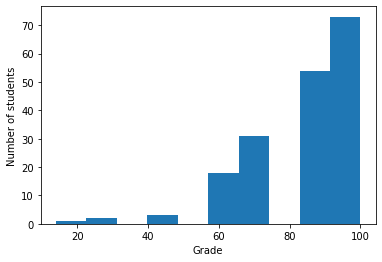

In [3]:
#GradesHistogram
plt.hist(grades["grade"])
plt.xlabel("Grade")
plt.ylabel("Number of students")
plt.savefig("graphs/GradeHistogram.png")
plt.show()

This is a simple midterm so the analysis is limited, but we can focus on four groups: 7/7,6/7,5/7,4/7,
mostly as a preperation for after analyzing finale exam

In [4]:
Grade7=grades.loc[grades["grade"]==100,"ID"]
Grade6=grades.loc[grades["grade"]==86,"ID"]
Grade5=grades.loc[grades["grade"]==71,"ID"]
Grade4=grades.loc[grades["grade"]==57,"ID"]

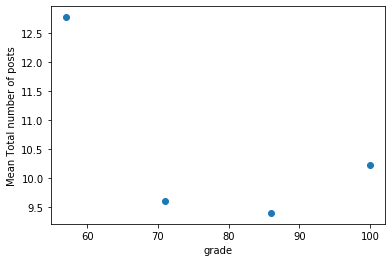

In [5]:
Means=np.array([np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Total"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Total"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Total"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Total"])])
Medians=np.array([np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Total"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Total"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Total"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Total"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean Total number of posts")
plt.show()

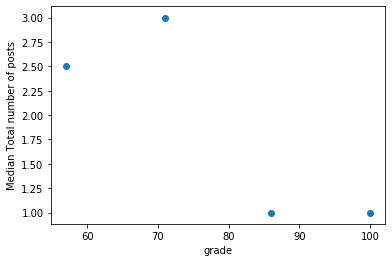

In [6]:
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median Total number of posts")
plt.show()

Looks like High achievers, arent active in the forum!

Lets examine that with writing and responding as well:

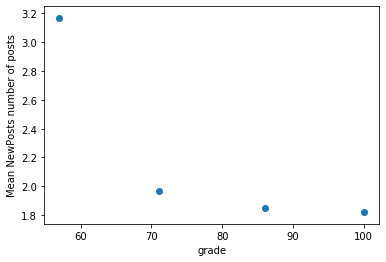

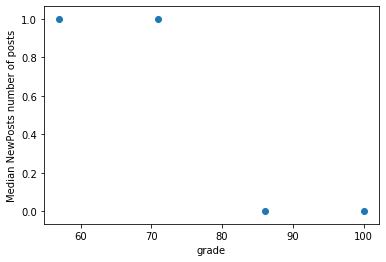

In [7]:
Means=np.array([np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"NewPosts"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"NewPosts"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"NewPosts"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"NewPosts"])])
Medians=np.array([np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"NewPosts"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"NewPosts"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"NewPosts"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"NewPosts"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean NewPosts number of posts")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median NewPosts number of posts")
plt.show()

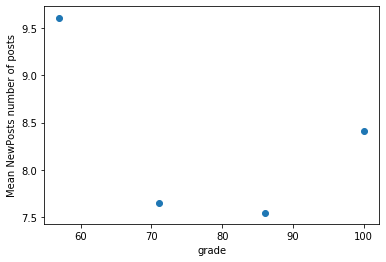

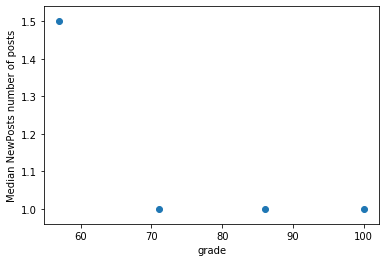

In [8]:
Means=np.array([np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Comments"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Comments"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Comments"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Comments"])])
Medians=np.array([np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Comments"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Comments"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Comments"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Comments"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean NewPosts number of posts")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median NewPosts number of posts")
plt.show()

Same Behaviour!

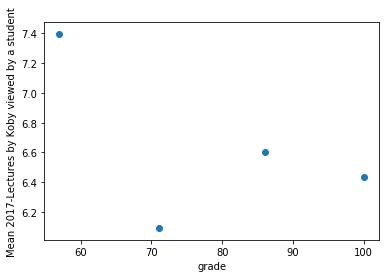

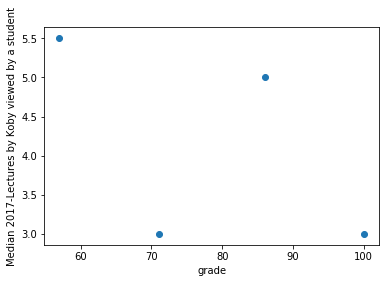

In [9]:
Means=np.array([np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"KobiViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"KobiViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"KobiViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"KobiViews"])])
Medians=np.array([np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"KobiViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"KobiViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"KobiViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"KobiViews"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean 2017-Lectures by Koby viewed by a student")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median 2017-Lectures by Koby viewed by a student")
plt.show()

No clear pattern!

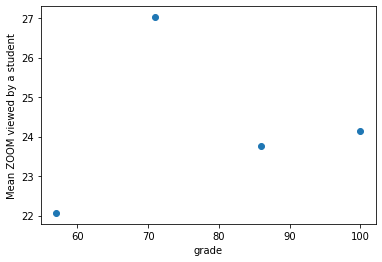

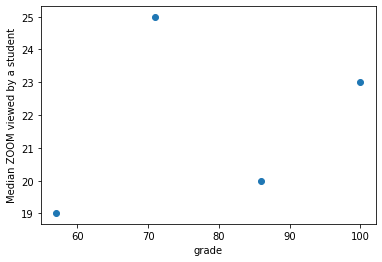

In [10]:
Means=np.array([np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"ZoomViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"ZoomViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"ZoomViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"ZoomViews"])])
Medians=np.array([np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"ZoomViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"ZoomViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"ZoomViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"ZoomViews"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean ZOOM viewed by a student")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median ZOOM viewed by a student")
plt.show()

Some Linear Pattern

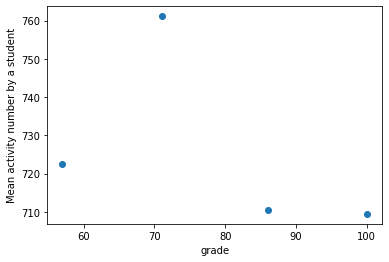

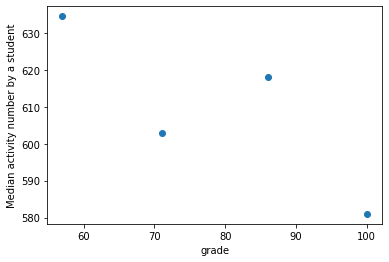

In [11]:
Means=np.array([np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"AllRows"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"AllRows"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"AllRows"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"AllRows"])])
Medians=np.array([np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"AllRows"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"AllRows"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"AllRows"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"AllRows"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean activity number by a student")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median activity number by a student")
plt.show()

Badges:

Control Group Mean: 86.20454545454545 Control Group Median: 86.0
Badge Group Mean: 82.79569892473118 Badge Group Median: 86.0


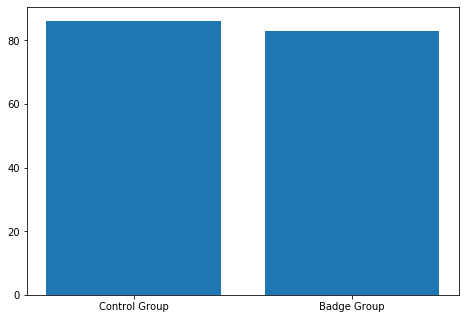

In [52]:
grades2=grades.set_index("ID")
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(["Control Group", "Badge Group"], np.array([grades.loc[grades["ID"].isin(ControlGroup["id"]),"grade"].mean(), grades.loc[grades["ID"].isin(BadgeGroup["id"]),"grade"].mean()]))
print("Control Group Mean: "+str(grades.loc[grades["ID"].isin(ControlGroup["id"]),"grade"].mean())+" Control Group Median: "+str(grades.loc[grades["ID"].isin(ControlGroup["id"]),"grade"].median()))
print("Badge Group Mean: "+str(grades.loc[grades["ID"].isin(BadgeGroup["id"]),"grade"].mean())+" Badge Group Median: "+str(grades.loc[grades["ID"].isin(BadgeGroup["id"]),"grade"].median()))

Not sure- maybe the more serious you are the less you stroll around and just work.

Thoughts about continueing
instead of 4 groups: only 2
analysis of text in forum- most dominant 20 words